In [1]:
# python -u scripts_py/map_nc_robustness_cal.py --dataset_name dota_train --pickle_result_path playground/mmrotate_workdir/rotated-retinanet-rbox-le90_r50_fpn_1x_dota-train/results_val.pkl --csv_result_path playground/mmrotate_workdir/rotated-retinanet-rbox-le90_r50_fpn_1x_dota-train/results_val_score_threshold.csv
# python -u scripts_py/map_nc_robustness_cal.py --dataset_name dota_train --pickle_result_path playground/mmrotate_workdir/rotated-fcos-le90_r50_fpn_1x_dota-train/results_val.pkl --csv_result_path playground/mmrotate_workdir/rotated-fcos-le90_r50_fpn_1x_dota-train/results_val_score_threshold.csv
# python -u scripts_py/map_nc_robustness_cal.py --dataset_name dior --pickle_result_path scripts_py/eval_mmrotate/rotated-retinanet-rbox-le90_r50_fpn_1x_dior/rotated-retinanet-rbox-le90_r50_fpn_1x_dior/results_test.pkl --csv_result_path scripts_py/eval_mmrotate/rotated-retinanet-rbox-le90_r50_fpn_1x_dior/rotated-retinanet-rbox-le90_r50_fpn_1x_dior/results_test_score_threshold.csv
# python -u scripts_py/map_nc_robustness_cal.py --dataset_name dior --pickle_result_path playground/mmrotate_workdir/rotated-fcos-le90_r50_fpn_1x_dior-2/results_test.pkl --csv_result_path playground/mmrotate_workdir/rotated-fcos-le90_r50_fpn_1x_dior-2/results_test_score_threshold.csv

In [2]:
import pandas as pd

def custom_read(path):
    df = pd.read_csv(path)
    original_mAP = df["score"].iloc[0]
    map_nc_std = df["rnd:std"].to_list()
    df = df.drop(["score", "rnd:min", "rnd:max", "rnd:mean", "rnd:std"], axis=1)
    df = df.rename(columns={'Unnamed: 0': 'confidence threshold'})
    return df, original_mAP, map_nc_std

all_df = {
    "dota": {
        "Rotated RetinaNet": custom_read("../playground/mmrotate_workdir/rotated-retinanet-rbox-le90_r50_fpn_1x_dota-train/results_val_score_threshold.csv"), 
        "Rotated FCOS": custom_read("../playground/mmrotate_workdir/rotated-fcos-le90_r50_fpn_1x_dota-train/results_val_score_threshold.csv"),
    }, 
    "dior": {
        "Rotated RetinaNet": custom_read("../scripts_py/eval_mmrotate/rotated-retinanet-rbox-le90_r50_fpn_1x_dior/rotated-retinanet-rbox-le90_r50_fpn_1x_dior/results_test_score_threshold.csv"),
        "Rotated FCOS": custom_read("../playground/mmrotate_workdir/rotated-fcos-le90_r50_fpn_1x_dior-2/results_test_score_threshold.csv"),
    },
}

all_df["dota"]["Rotated RetinaNet"][0]

,confidence threshold,1,rnd:42,rnd:666,rnd:6666,rnd:66666,rnd:666666,rnd:2024,rnd:9968,rnd:0,rnd:1,rnd:123
0,0.00,0.112284,0.139447,0.097201,0.103550,0.097207,0.143998,0.108961,0.108513,0.099232,0.101908,0.094158
1,0.05,0.112284,0.139447,0.097201,0.103550,0.097207,0.143998,0.108961,0.108513,0.099232,0.101908,0.094158
2,0.10,0.223215,0.236335,0.210808,0.219614,0.214037,0.249289,0.217167,0.220462,0.219057,0.220539,0.208842
3,0.15,0.320193,0.321416,0.303319,0.305574,0.300849,0.337409,0.316186,0.314740,0.310339,0.314420,0.299835
4,0.20,0.381587,0.390758,0.379506,0.371552,0.368235,0.408093,0.382650,0.381682,0.378353,0.381020,0.370403
5,0.25,0.424177,0.423847,0.420622,0.413799,0.411901,0.442193,0.424186,0.423363,0.417383,0.419487,0.412318
6,0.30,0.450886,0.451652,0.440570,0.445194,0.436977,0.455876,0.449847,0.444017,0.441047,0.443210,0.436040
7,0.35,0.466024,0.463387,0.453390,0.450343,0.453015,0.467964,0.458653,0.454147,0.455407,0.453091,0.447368
8,0.40,0.457858,0.463645,0.459054,0.454818,0.455596,0.469031,0.463713,0.460860,0.459619,0.452290,0.450305
9,0.45,0.442899,0.441087,0.436842,0.436076,0.435169,0.443382,0.439535,0.439810,0.436647,0.430922,0.428649


In [3]:
def convert_to_long_format(df, model_name, dataset_name):
    df_long = pd.melt(
        df,
        id_vars=['confidence threshold'],
        value_vars=['1', 'rnd:42', 'rnd:666', 'rnd:6666', 'rnd:66666', 'rnd:666666', 'rnd:2024', 'rnd:9968', 'rnd:0', 'rnd:1', 'rnd:123'],
        var_name='setting',
        value_name='mAP_nc'
    )
    df_long['Model'] = model_name
    df_long['Dataset'] = dataset_name
    return df_long

df_long_1 = convert_to_long_format(all_df["dota"]["Rotated RetinaNet"][0], "Rotated RetinaNet", "DOTA")
df_long_2 = convert_to_long_format(all_df["dota"]["Rotated FCOS"][0], "Rotated FCOS", "DOTA")
df_long_3 = convert_to_long_format(all_df["dior"]["Rotated RetinaNet"][0], "Rotated RetinaNet", "DIOR")
df_long_4 = convert_to_long_format(all_df["dior"]["Rotated FCOS"][0], "Rotated FCOS", "DIOR")

df_long = pd.concat([df_long_1, df_long_2, df_long_3, df_long_4], ignore_index=True)
df_long["mAP_nc"] = df_long["mAP_nc"] * 100
df_long

,confidence threshold,setting,mAP_nc,Model,Dataset
0,0.00,1,11.228413,Rotated RetinaNet,DOTA
1,0.05,1,11.228413,Rotated RetinaNet,DOTA
2,0.10,1,22.321531,Rotated RetinaNet,DOTA
3,0.15,1,32.019323,Rotated RetinaNet,DOTA
4,0.20,1,38.158670,Rotated RetinaNet,DOTA
...,...,...,...,...,...
875,0.75,rnd:123,6.817157,Rotated FCOS,DIOR
876,0.80,rnd:123,5.454545,Rotated FCOS,DIOR
877,0.85,rnd:123,2.727273,Rotated FCOS,DIOR
878,0.90,rnd:123,0.454545,Rotated FCOS,DIOR


Times New Roman


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


{'RetinaNet@DOTA': 60.24814748764038, 'FCOS@DOTA': 64.84019160270691, 'RetinaNet@DIOR': 53.95050048828125, 'FCOS@DIOR': 61.470526456832886}


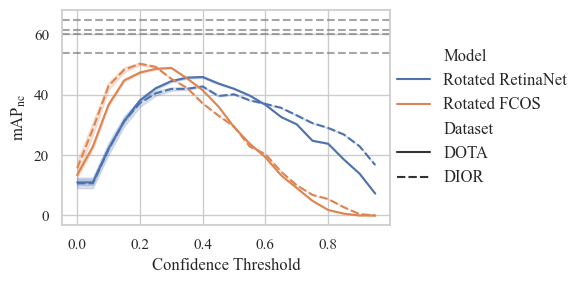

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager

sns.set_theme(style="whitegrid")

font_manager.fontManager.addfont("./times.ttf")
times_new_roman = font_manager.FontProperties(fname="./times.ttf")
print(times_new_roman.get_name())
rcParams['font.family'] = times_new_roman.get_name()
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = times_new_roman.get_name()
rcParams['mathtext.it'] = times_new_roman.get_name()
rcParams['mathtext.bf'] = times_new_roman.get_name()
rcParams['font.weight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titleweight'] = 'bold'

plt.figure(figsize=(6, 3))

sns.lineplot(x="confidence threshold", y="mAP_nc", hue="Model", style="Dataset", data=df_long)

original_mAP = {
    "RetinaNet@DOTA": all_df["dota"]["Rotated RetinaNet"][1] * 100 - 1,  # 不然重叠了难看
    "FCOS@DOTA": all_df["dota"]["Rotated FCOS"][1] * 100,
    "RetinaNet@DIOR": all_df["dior"]["Rotated RetinaNet"][1] * 100,
    "FCOS@DIOR": all_df["dior"]["Rotated FCOS"][1] * 100
}
print(original_mAP)
for label, y in original_mAP.items():
    plt.axhline(y=y, linestyle="--", color="gray", alpha=0.7)

plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    borderaxespad=0,
    frameon=False, 
    prop=font_manager.FontProperties(fname="./times.ttf", weight='bold')
)

plt.xlabel("Confidence Threshold", fontweight='bold', fontproperties=times_new_roman)
plt.ylabel(r"$mAP_{nc}$", fontweight='bold', fontproperties=times_new_roman)
plt.tight_layout()

plt.savefig("score_impact.svg", bbox_inches='tight')  # 保存为 SVG 格式
plt.show()

In [5]:
import numpy as np
all_std = {
    "RetinaNet@DOTA": (np.array(all_df["dota"]["Rotated RetinaNet"][2]) * 100).tolist(),  # 不然重叠了难看
    "FCOS@DOTA": (np.array(all_df["dota"]["Rotated FCOS"][2]) * 100).tolist(),
    "RetinaNet@DIOR": (np.array(all_df["dior"]["Rotated RetinaNet"][2]) * 100).tolist(),
    "FCOS@DIOR": (np.array(all_df["dior"]["Rotated FCOS"][2]) * 100).tolist()
}
for k, v in all_std.items():
    print(k, "\n", v)

RetinaNet@DOTA 
 [1.8026207166771402, 1.8026207166771402, 1.31986902259358, 1.21732545023143, 1.26535384932444, 0.9691423465705199, 0.6607766042088501, 0.65457125956423, 0.60396554547793, 0.47397303299032006, 0.26696476303125, 0.24387671589308, 0.12515766921603, 0.14125963886034001, 0.06952950186539, 0.04295178294085, 0.037193166494090005, 0.01740951896208, 0.0111379604751, 0.00139004257595092]
FCOS@DOTA 
 [1.89466819984269, 1.82737044080694, 1.190606104786, 0.86107087600321, 0.67941646416452, 0.45725777185784006, 0.33936273707369, 0.1518650458065, 0.18605395125509, 0.11924902901249, 0.06774019939485, 0.04368608820968, 0.006834218618852177, 0.005959739419734005, 0.0012010404978872512, 0.0, 0.0, 0.0, 0.0, 0.0]
RetinaNet@DIOR 
 [3.43265888652191, 3.43265888652191, 4.032990260850481, 3.1756319271254303, 2.25625760554932, 1.50777358970838, 1.1517360325203, 0.66612303689676, 0.48360658243653, 0.42074127419784, 0.24132414645284, 0.16559478260541, 0.09677389923214, 0.10742970954035001, 0.1430